<a href="https://colab.research.google.com/github/andresanchetta/Aulas_Udemy/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
# Importando os dados e verificando o tamanho do DF:
url = 'https://raw.githubusercontent.com/andresanchetta/Aulas_Udemy/main/Dados/Credit.csv'
credito = pd.read_csv(url, sep = ',')
dados.shape

(1000, 21)

In [10]:
# Explorando o DF:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


O DF é um conjunto de dados de clientes de banco, o qual solicitaram crédito, e a classe, a variavel que tentaremos prever com o modelo, indica se são bons ou mal pagadores.

In [11]:
# Definição dos previsores (variáveis independentes - X) e a classe (variável dependente - y), transformando em matriz:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

Para seguir com a análise, é preciso transformar os atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica.  
É precisamos criar um objeto para cada atributo categórico, pois na sequência é executado o processo de encoding novamente para o registro de teste, através do label encoder.  
Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente.

In [12]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [13]:
# Divisão da base de dados entre treinamento e teste (30% para teste e 70% para treino), assim evitando o superajuste do modelo:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [14]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [16]:
# Geração da matriz de confusão, para avaliar a qualidade da pevisão do modelo:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [17]:
#Cálculo da taxa de acerto:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

Conclui-se que o modelo apresentou uma taxa de acerto de 71%.

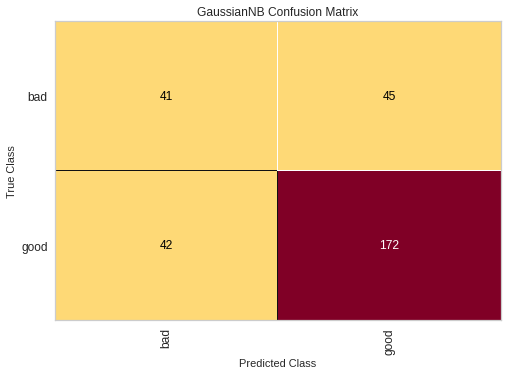

In [18]:
# Visualização da matriz de confusão de forma gráfica:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

Previsão realizada para dados que não estavam nem no treino, nem no teste:

In [22]:
url_novo = 'https://raw.githubusercontent.com/andresanchetta/Aulas_Udemy/main/Dados/NovoCredit.csv'
novo_credito = pd.read_csv(url_novo, sep = ',')
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [20]:
# Usamos o mesmo objeto que foi criado antes, para manter o padrão dos dados.
# Apenas transformamos os dados, pois o modelo ja está criado.
novo_credito = novo_credito.iloc[:,0:20].values
novo_credito[:,0] = labelencoder1.transform(novo_credito[:,0])
novo_credito[:, 2] = labelencoder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelencoder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelencoder4.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelencoder5.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelencoder6.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelencoder7.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelencoder8.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelencoder9.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelencoder10.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelencoder11.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelencoder12.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelencoder13.transform(novo_credito[:, 19])

In [21]:
# Resultado da previsão
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')

Através dos dados de entrada, o modelo concluiu que o novo cliente será um bom pagador.